In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor

import sklearn

from xgboost import XGBRegressor
from xgboost import plot_importance

import statsmodels.formula.api as smf
import random

In [4]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data['car_ID'].duplicated().sum()

0

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
selected_features = [
    "fueltype",
    "aspiration",
    "doornumber",
    "carbody",
    "drivewheel",
    "enginelocation",
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
]


In [12]:
data[selected_features]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824
...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217


<Axes: xlabel='horsepower'>

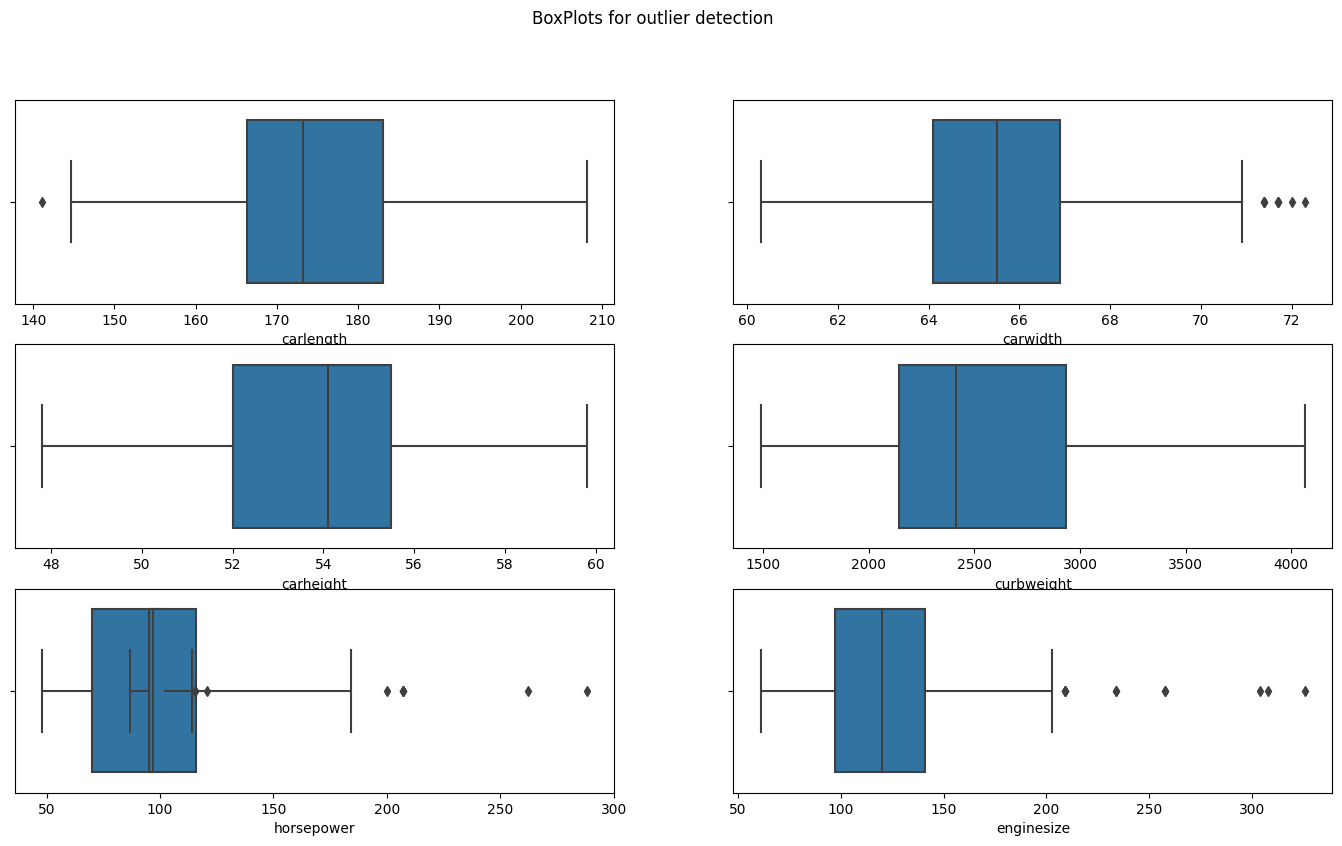

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(17, 9))
fig.suptitle("BoxPlots for outlier detection")

# Boxplots
sns.boxplot(ax=axes[0, 0], x='carlength', data=data)
sns.boxplot(ax=axes[0, 1], x='carwidth', data=data)
sns.boxplot(ax=axes[1, 0], x='carheight', data=data)
sns.boxplot(ax=axes[1, 1], x='curbweight', data=data)
sns.boxplot(ax=axes[2, 0], x='wheelbase', data=data)
sns.boxplot(ax=axes[2, 1], x='enginesize', data=data)

# Add the horsepower boxplot in the third row
sns.boxplot(ax=axes[2, 0], x='horsepower', data=data)


<Axes: >

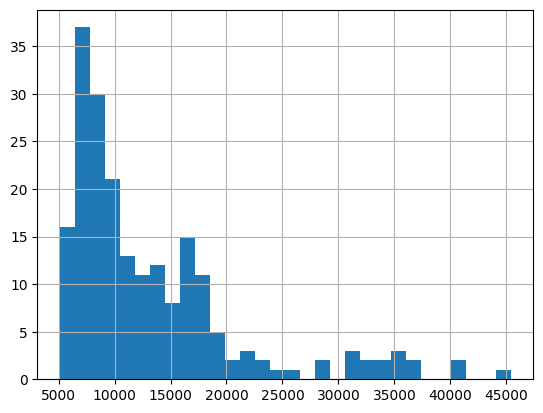

In [14]:
data['price'].hist(bins=30)

In [15]:
data['price_log'] = np.log(data['price'])

In [16]:
data['volume'] = data['carlength'] * data['carwidth'] * data['carheight']
data['volume']

0      528019.904
1      528019.904
2      587592.640
3      634816.956
4      636734.832
          ...    
200    721961.760
201    720913.920
202    721961.760
203    721961.760
204    721961.760
Name: volume, Length: 205, dtype: float64

In [17]:
data['powweigratio'] = data['horsepower'] / data['curbweight']
data['powweigratio']

0      0.043564
1      0.043564
2      0.054552
3      0.043646
4      0.040722
         ...   
200    0.038618
201    0.052476
202    0.044489
203    0.032950
204    0.037231
Name: powweigratio, Length: 205, dtype: float64

In [18]:
data['esizehpratio'] = data['enginesize'] / data['horsepower']
data['esizehpratio']

0      1.171171
1      1.171171
2      0.987013
3      1.068627
4      1.182609
         ...   
200    1.236842
201    0.881250
202    1.291045
203    1.367925
204    1.236842
Name: esizehpratio, Length: 205, dtype: float64

In [19]:
X = pd.get_dummies(data[['esizehpratio','powweigratio', 'volume', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation','wheelbase']], drop_first=True)

y = data['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [20]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [21]:
%%time
rf = RandomForestRegressor(random_state=0)
cv_params = {'max_depth': [7],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2,3,4],
 'max_features': [6, 7, 8],
 'n_estimators': [150],
 'max_samples' : [1.0]
 }
scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='neg_root_mean_squared_error')
rf_cv.fit(X_train, y_train)

CPU times: user 27.2 s, sys: 152 ms, total: 27.3 s
Wall time: 30.5 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [7], 'max_features': [6, 7, 8],
                         'max_samples': [1.0], 'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150]},
             refit='neg_root_mean_squared_error',
             scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'])

In [22]:
rf_cv.best_params_
# RandomForestRegressor(max_depth=7, max_features=9, max_samples=1.0,
                      # min_samples_split=4, n_estimators=150, random_state=0)

{'max_depth': 7,
 'max_features': 8,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

In [23]:
np.exp(np.absolute(rf_cv.best_score_))

1.2272129204110214

In [25]:
import pandas as pd

def make_regression_results(model_name, model_object, scoring='neg_root_mean_squared_error'):
    '''
    Accepts as arguments a model name (string) and a fit GridSearchCV model object.
    Returns a pandas df with the R2, MSE, MAE, and RMSE scores for the model with the best mean RMSE score across all validation folds.
    '''
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean RMSE score)
    best_estimator_results = cv_results.iloc[cv_results[f'mean_test_{scoring}'].idxmax(), :]

    # Extract R2, MSE, MAE, and RMSE from that row
    r2 = best_estimator_results[f'mean_test_r2']
    mse = -best_estimator_results[f'mean_test_neg_mean_squared_error']
    mae = -best_estimator_results[f'mean_test_neg_mean_absolute_error']
    rmse = -best_estimator_results[f'mean_test_{scoring}']

    # Create table of results
    table = pd.DataFrame()
    table = table.append({
        'Model': model_name,
        'R2': r2,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    }, ignore_index=True)

    return table


In [26]:
rf_cv_results = make_regression_results('Random Forest CV', rf_cv)
rf_cv_results['MSE'] = np.exp(rf_cv_results['MSE'])
rf_cv_results['MAE'] = np.exp(rf_cv_results['MAE'])
rf_cv_results['RMSE'] = np.exp(rf_cv_results['RMSE'])
rf_cv_results


<ipython-input-25-a3167df616da>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({


,Model,R2,MSE,MAE,RMSE
0,Random Forest CV,0.824825,1.043659,1.172272,1.227213


In [27]:

# cond = "price_log ~ " + " + ".join(['esizehpratio','powweigratio', 'C(fueltype)', 'C(aspiration)', 'C(doornumber)', 'C(carbody)', 'C(drivewheel)', 'C(enginelocation)','wheelbase'])
# cond

In [52]:
y_pred = rf_cv.predict(X_test)

In [54]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [55]:
results = {
    'Model on Test' : ['Random Forest CV'],
    'R2' : [r2],
    'MSE' : [np.exp(mse)],
    'MAE' : [np.exp(mae)],
    'RMSE' : [np.exp(rmse)]
}
results = pd.DataFrame(results)
results

,Model on Test,R2,MSE,MAE,RMSE
0,Random Forest CV,0.866455,1.029354,1.140538,1.185416
